# Applications of MLP

### Importing the libraries

In [24]:
import numpy as np
import pandas as pd
import tensorflow as tf

## Part 1 - Data Preprocessing

### Importing the dataset

In [25]:
dataset = pd.read_csv('diabetes_prediction_dataset.csv')

In [26]:
dataset

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [27]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:, -1].values

In [28]:
pd.DataFrame(X, columns = ["Gender","Age","Hypertension","HeartDisease","SmokingHistory","BMI","HbA1cLevel","BloodGlucoseLevel"])

,Gender,Age,Hypertension,HeartDisease,SmokingHistory,BMI,HbA1cLevel,BloodGlucoseLevel
0,Female,80.0,0,1,never,25.19,6.6,140
1,Female,54.0,0,0,No Info,27.32,6.6,80
2,Male,28.0,0,0,never,27.32,5.7,158
3,Female,36.0,0,0,current,23.45,5.0,155
4,Male,76.0,1,1,current,20.14,4.8,155
...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90
99996,Female,2.0,0,0,No Info,17.37,6.5,100
99997,Male,66.0,0,0,former,27.83,5.7,155
99998,Female,24.0,0,0,never,35.42,4.0,100


In [29]:
pd.DataFrame(y, columns = ["Diabetes"])

,Diabetes
0,0
1,0
2,0
3,0
4,0
...,...
99995,0
99996,0
99997,0
99998,0


In [30]:
X

array([['Female', 80.0, 0, ..., 25.19, 6.6, 140],
       ['Female', 54.0, 0, ..., 27.32, 6.6, 80],
       ['Male', 28.0, 0, ..., 27.32, 5.7, 158],
       ...,
       ['Male', 66.0, 0, ..., 27.83, 5.7, 155],
       ['Female', 24.0, 0, ..., 35.42, 4.0, 100],
       ['Female', 57.0, 0, ..., 22.43, 6.6, 90]], dtype=object)

In [31]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Encoding categorical data

Label Encoding the "Gender" column

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 0] = le.fit_transform(X[:, 0])

In [33]:
print(X)

[[0 80.0 0 ... 25.19 6.6 140]
 [0 54.0 0 ... 27.32 6.6 80]
 [1 28.0 0 ... 27.32 5.7 158]
 ...
 [1 66.0 0 ... 27.83 5.7 155]
 [0 24.0 0 ... 35.42 4.0 100]
 [0 57.0 0 ... 22.43 6.6 90]]


One Hot Encoding the "SmokingHistory" column

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [4])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [35]:
print(X)

[[0.0 0.0 0.0 ... 25.19 6.6 140]
 [1.0 0.0 0.0 ... 27.32 6.6 80]
 [0.0 0.0 0.0 ... 27.32 5.7 158]
 ...
 [0.0 0.0 0.0 ... 27.83 5.7 155]
 [0.0 0.0 0.0 ... 35.42 4.0 100]
 [0.0 1.0 0.0 ... 22.43 6.6 90]]


### Splitting the dataset into the Training set and Test set

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

### Feature Scaling

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [38]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [39]:
ann.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Adding the second hidden layer


In [40]:
ann.add(tf.keras.layers.Dense(units=16, activation='gelu'))
ann.add(tf.keras.layers.Dense(units=4, activation='gelu'))
ann.add(tf.keras.layers.Dense(units=2, activation='gelu'))

### Adding the output layer

In [41]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [42]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [43]:
ann.fit(X_train, y_train, batch_size = 1000, epochs = 50)

Epoch 1/50


80/80 [==============================] - 4s 9ms/step - loss: 0.5311 - accuracy: 0.9057
Epoch 2/50
80/80 [==============================] - 1s 9ms/step - loss: 0.1969 - accuracy: 0.9271
Epoch 3/50
80/80 [==============================] - 1s 7ms/step - loss: 0.1437 - accuracy: 0.9396
Epoch 4/50
80/80 [==============================] - 1s 7ms/step - loss: 0.1397 - accuracy: 0.9426
Epoch 5/50
80/80 [==============================] - 1s 7ms/step - loss: 0.1386 - accuracy: 0.9467
Epoch 6/50
80/80 [==============================] - 1s 7ms/step - loss: 0.1377 - accuracy: 0.9508
Epoch 7/50
80/80 [==============================] - 0s 5ms/step - loss: 0.1370 - accuracy: 0.9551
Epoch 8/50
80/80 [==============================] - 0s 5ms/step - loss: 0.1363 - accuracy: 0.9573
Epoch 9/50
80/80 [==============================] - 0s 5ms/step - loss: 0.1354 - accuracy: 0.9587
Epoch 10/50
80/80 [==============================] - 0s 6ms/step - loss: 0.1347 - accuracy: 0.9592
Epoch 11/50
80/80 [===========

## Part 4 - Making the predictions and evaluating the model

### Predicting the Test set results

In [44]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

625/625 [==============================] - 2s 3ms/step
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Making the Confusion Matrix

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
print("\nAccuracy:  ", accuracy_score(y_test, y_pred))
print("F1 Score:  ", f1_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall:    ", recall_score(y_test, y_pred))


[[18234    63]
 [  525  1178]]

Accuracy:   0.9706
F1 Score:   0.8002717391304348
Precision:  0.9492344883158743
Recall:     0.6917204932472109


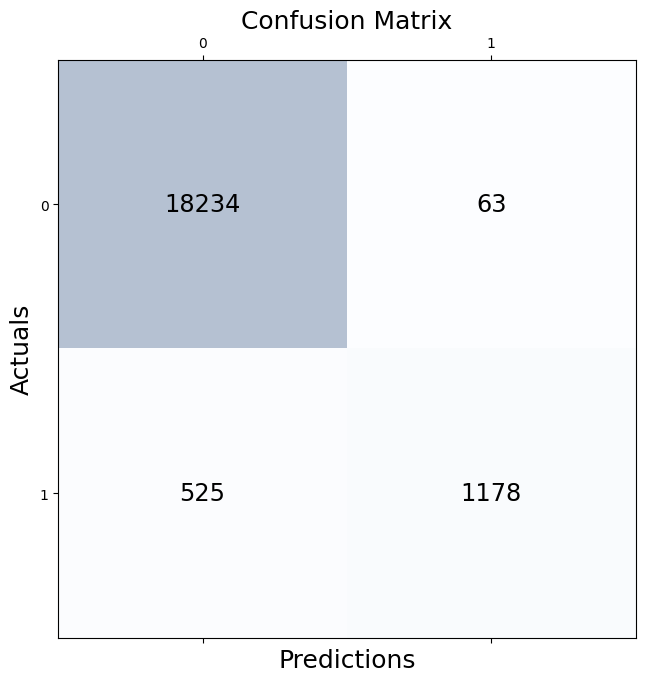

In [46]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

**Homework**
- Use the dataset: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset.
- Experiment with the number of hidden layers, and the number of units in the hidden layer.
- Try to experiment on the activation functions in the hidden layer https://www.tensorflow.org/api_docs/python/tf/keras/activations
- Try to experiment with the optimizer: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
- Check the accuracy, specificity, and sensitivity of your model.